# Лабораторна робота 5
### Студентки групи МІТ-31 
### Рубан Маргарити Юріївни

## Завдання
1. Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [3]:
%pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

     |████████████████████████████████| 207.1 MB 70 kB/s 
     |████████████████████████████████| 1.6 MB 15.1 MB/s 
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
     |████████████████████████████████| 4.0 MB 6.9 MB/s 
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 126 kB 19.7 MB/s 
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-12.0.0-py2.py3-none-macosx_10_9_x86_64.whl (12.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
     |████████████████████████████████| 1.0 MB 11.9 MB/s 
     |████████████████████████████████| 

In [4]:
model1 = pd.read_csv("data.csv")

In [5]:
insurance = model1
insurance.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [6]:
insurance.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [7]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1


In [8]:
X=insurance.drop("Fare",axis=1)
y=insurance["Fare"]

X.head(), y.head()

(   Passengerid   Age  Sex  sibsp  zero  zero.1  zero.2  zero.3  zero.4  \
 0            1  22.0    0      1     0       0       0       0       0   
 1            2  38.0    1      1     0       0       0       0       0   
 2            3  26.0    1      0     0       0       0       0       0   
 3            4  35.0    1      1     0       0       0       0       0   
 4            5  35.0    0      0     0       0       0       0       0   
 
    zero.5  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
 0       0  ...        0        0        0       3        0        0       2.0   
 1       0  ...        0        0        0       1        0        0       0.0   
 2       0  ...        0        0        0       3        0        0       2.0   
 3       0  ...        0        0        0       1        0        0       2.0   
 4       0  ...        0        0        0       3        0        0       2.0   
 
    zero.17  zero.18  2urvived  
 0        0        0 

In [9]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=48

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(1047, 27)

In [10]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
33/33 [==============================] - 1s 1ms/step - loss: nan - mse: nan             
Epoch 2/10
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 3/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 4/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 5/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 6/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 7/10
33/33 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 8/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 9/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 10/10
33/33 [==============================] - 0s 2ms/step - loss: nan - mse: nan


In [11]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mse: nan


In [12]:
from tensorflow.keras.utils import plot_model
plot_model(ins_model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [13]:
ins_model.save("ins_model.h5")

ins_model_loaded=tf.keras.models.load_model("ins_model.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,Passengerid,Age,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
996,997,28.0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
509,510,26.0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
946,947,10.0,0,4,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
1155,1156,30.0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,0
211,212,35.0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2.0,0,0,1


In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = model1
insurance2.head(2)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1


In [15]:
ct = make_column_transformer(
    (MinMaxScaler(),["Age", "Sex","2urvived"]), 
    (OneHotEncoder(handle_unknown="ignore"),['zero.' +str(i) for i in range(1,17)])
)
X=insurance2.drop("Fare", axis=1)
y = insurance2["Fare"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

# tf.random.set_seed(48)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [16]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

9/9 [==============================] - 0s 1ms/step - loss: 23.5955 - mae: 23.5955


(1047, 27)

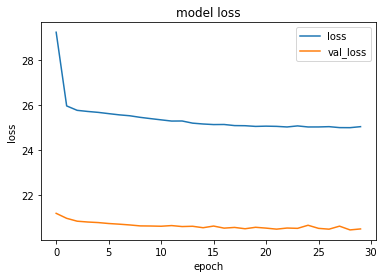

In [17]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [18]:
import numpy as np
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import pandas as pd
import seaborn as sns

In [19]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [20]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [21]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [22]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [23]:
train_labels[7]

2

In [24]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


len(class_names)

10

In [25]:

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0813 - accuracy: 0.1952 - val_loss: 1.7747 - val_accuracy: 0.2504
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7249 - accuracy: 0.2610 - val_loss: 1.6909 - val_accuracy: 0.2735
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6259 - accuracy: 0.3001 - val_loss: 1.5869 - val_accuracy: 0.3323
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5731 - accuracy: 0.3212 - val_loss: 1.5530 - val_accuracy: 0.3293
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5486 - accuracy: 0.3244 - val_loss: 1.5348 - val_accuracy: 0.3384
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5337 - accuracy: 0.3265 - val_loss: 1.5266 - val_accuracy: 0.3416
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5230 - accuracy: 0.3261 - val_loss: 1.5158 - val_accuracy

In [26]:
train_data.min(), train_data.max()

train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [27]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2118 - accuracy: 0.5418 - val_loss: 0.7820 - val_accuracy: 0.7174
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6647 - accuracy: 0.7598 - val_loss: 0.6530 - val_accuracy: 0.7655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5977 - accuracy: 0.7840 - val_loss: 0.6129 - val_accuracy: 0.7819
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5717 - accuracy: 0.7945 - val_loss: 0.5887 - val_accuracy: 0.7906
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5555 - accuracy: 0.8005 - val_loss: 0.5872 - val_accuracy: 0.7915
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5441 - accuracy: 0.8047 - val_loss: 0.5765 - val_accuracy: 0.7960
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5277 - accuracy: 0.8145 - val_loss: 0.5474 - val_accuracy

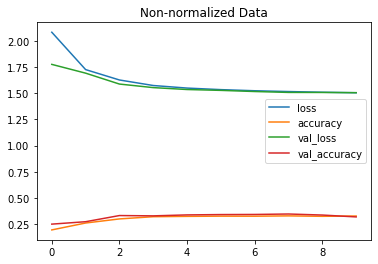

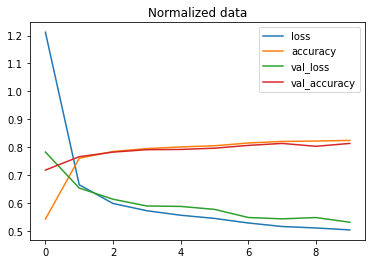

In [28]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [29]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, 
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4633 - accuracy: 0.4501 - val_loss: 1.0476 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9017 - accuracy: 0.6577 - val_loss: 0.8265 - val_accuracy: 0.6991 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7435 - accuracy: 0.7152 - val_loss: 0.7259 - val_accuracy: 0.7183 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6875 - accuracy: 0.7361 - val_loss: 0.6953 - val_accuracy: 0.7551 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6600 - accuracy: 0.7625 - val_loss: 0.6848 - val_accuracy: 0.7609 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6394 - accuracy: 0.7685 - val_loss: 0.6527 - val_accuracy: 0.7692 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

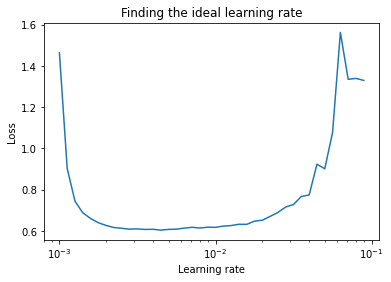

In [30]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [31]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/Users/margosha/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6127 - accuracy: 0.3154 - val_loss: 1.3621 - val_accuracy: 0.4317
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2496 - accuracy: 0.4672 - val_loss: 1.1809 - val_accuracy: 0.5060
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1197 - accuracy: 0.5310 - val_loss: 1.0997 - val_accuracy: 0.5403
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0537 - accuracy: 0.5755 - val_loss: 1.0479 - val_accuracy: 0.5866
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0088 - accuracy: 0.6055 - val_loss: 1.0089 - val_accuracy: 0.6241
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9502 - accuracy: 0.6433 - val_loss: 0.9523 - val_accuracy: 0.6490
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9075 - accuracy: 0.6588 - val_loss: 0.9222 - val_accuracy

In [32]:
y_probs = model_14.predict(test_data) 

y_probs[:5]

array([[1.17531914e-21, 1.69306263e-18, 1.53822828e-23, 1.79263548e-11,
        9.28180313e-15, 7.14290515e-02, 1.38240091e-19, 4.35643584e-01,
        8.75649130e-05, 4.92839783e-01],
       [2.09701341e-03, 2.82542101e-06, 1.69496670e-01, 2.60293460e-03,
        5.75035036e-01, 4.68624115e-04, 1.04412675e-01, 8.86458220e-05,
        1.45795465e-01, 7.87355816e-08],
       [3.35053587e-03, 9.90729749e-01, 2.15839968e-08, 5.91467088e-03,
        5.42878054e-09, 2.33197295e-10, 5.06660035e-06, 3.77344410e-18,
        7.20722388e-16, 4.74378701e-14],
       [1.53048174e-03, 9.91553605e-01, 5.13698284e-09, 6.91395206e-03,
        2.64134825e-09, 5.34886357e-10, 1.97758368e-06, 7.37143326e-18,
        7.13960418e-16, 1.67303224e-13],
       [2.24955156e-01, 2.24133069e-03, 3.42991114e-01, 1.35796471e-02,
        3.95218618e-02, 7.85210545e-07, 3.76706183e-01, 5.52306811e-10,
        3.94842027e-06, 3.34235833e-11]], dtype=float32)

In [33]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [34]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 4, 1, 1, 6, 1, 4, 2, 5, 7])

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[721,   0,  94,  85,  27,   0,  63,   0,  10,   0],
       [ 20, 896,   6,  67,   5,   0,   5,   0,   1,   0],
       [ 26,   0, 596,  16, 309,   0,  47,   0,   6,   0],
       [ 29,   4,  18, 803,  63,  26,  45,   0,  12,   0],
       [  2,   0,  97,  43, 811,   2,  24,   0,  21,   0],
       [  0,   0,   0,  22,   0, 840,   0,  93,  15,  30],
       [136,   0, 296,  52, 347,   0, 157,   0,  12,   0],
       [  0,   0,   0,   0,   0,  82,   0, 867,   3,  48],
       [  1,   0,   7,  11,  80,  18,   5,  11, 867,   0],
       [  0,   0,   0,   1,   1,  48,   0,  53,   0, 897]])

In [36]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [37]:
model_14.layers

In [38]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.08838373, -0.14857921, -0.07225071,  0.61988807],
        [-0.6193038 ,  0.30186552, -0.6445154 ,  0.91368943],
        [-0.55568874,  0.960825  , -0.9700708 ,  0.85004723],
        ...,
        [ 0.2875026 , -0.01119942,  0.13704745,  0.08927155],
        [ 0.58855104, -0.3381038 ,  0.5714531 , -0.10651717],
        [-0.03592432,  0.04374584, -0.14592892,  0.7222408 ]],
       dtype=float32),
 (784, 4))

In [39]:
biases, biases.shape

(array([ 2.4688246 , -1.6257247 , -0.09493445,  1.8782655 ], dtype=float32),
 (4,))

In [40]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 4)                 3140      
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
